In [1]:
from PyPDF2 import PdfReader
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

First I extract the text using PyPDF2 library. 

Next, I clean titles, punctuations and repeated words. 

Finally I use word cloud visualization to show the most repeated words on text.

### Read file

In [2]:
pdf_file_name2 = 'CPRprop.pdf'

def visitor_body(text, cm, tm, fontDict, fontSize):
    y = tm[5]
    if y > 20 and y < 650: 
        parts.append(text)

In [3]:
text_new = ''
with open(pdf_file_name2, 'rb') as pdf_file:
    #Read the PDF file
    pdf_reader = PdfReader(pdf_file)

    for page_num in range(6, 156):
        parts = []
        page = pdf_reader.pages[page_num]
        #Extract text from the given PDF file page
        page.extract_text(visitor_text=visitor_body)
        text_body = "".join(parts)
        text_new += text_body + ' '

### remove titles, articules and points

In [4]:
chapters = re.findall(r'\nCAPÍTULO[A-Z\s.,ÁÉÍÓÚ]+', text_new)
for chap in chapters:
    text_new = re.sub(chap[:-2],'',text_new)

In [5]:
articulo = re.findall(r'\nArtículo \d+', text_new)[::-1]
for artic in articulo:
    text_new = re.sub(artic,'',text_new)

In [6]:
numbers = list(set(re.findall(r'\n[\d]+\.', text_new)))
for numb in numbers:
    text_new = re.sub(numb,'',text_new)

In [7]:
points = list(set(re.findall(r'\n[a-z]+\)', text_new)))
for point in points:
    #print(point)
    text_new = re.sub(re.escape(point),'',text_new)

### Remove stop words and punctuation

In [8]:
text = re.sub(r"\n", "", text_new)
text = text.lower()

In [9]:
#The word_tokenize() function will break our text phrases into individual words.
tokens = word_tokenize(text)
#We'll create a new list that contains punctuation we wish to clean.
punctuations = ['(',')',';',':','[',']',',','○','–','.','-','’']
#We create a list comprehension that only returns a list of words that are NOT IN punctuations.
keywords = [word for word in tokens if not word in punctuations]

text_cloud = " ".join(keywords)

### Create wordcloud

In [10]:
stop_words = stopwords.words('spanish')

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 20).generate(text_cloud)

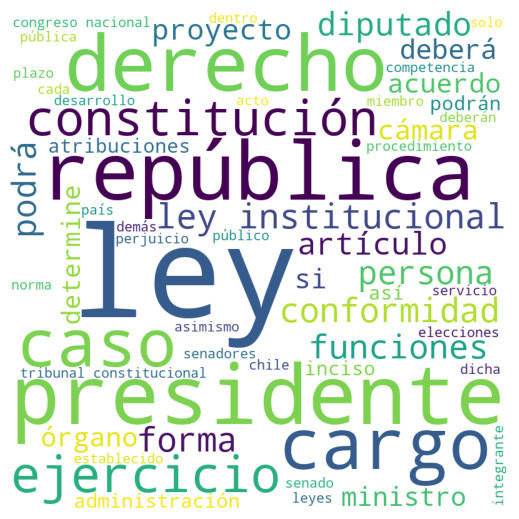

In [13]:
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('wordcloud_CPR.jpg') 
#plt.show()